# Modeling of Data

In this worksheet we will explore modelling a single dataset with a variety of techniques. We will decide which model best fits the dataset. 
[background material in this presentation](./phys113_optimization2.pptx)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline

I have generated a chemical concentration vs reaction rate dataset. X values are the concentration of the chemical and y values are the measured reaction rate. The measured reaction rate y has gaussian errors with varying standard deviation (our experimental measurement apparatus is predictably unreliable).  

In [2]:
#defining concentration dataset
x = np.linspace(0,6,40)
y = np.array([0.08599334, 0.34773751, 0.88607836, 0.91849768, 1.24850685,
       1.29477312, 1.31030779, 1.00972797, 1.47800085, 1.41082652,
       1.29654454, 1.92972536, 1.36311027, 1.55996423, 1.9562846 ,
       1.40668205, 1.53830729, 1.72135509, 1.95658203, 1.72355114,
       1.64280001, 1.71091304, 1.38315546, 1.88707567, 1.76155702,
       1.63132042, 1.8003272 , 1.57813022, 2.08194155, 1.85366049,
       1.72478809, 1.92994659, 1.9700196 , 1.80047987, 1.7949588 ,
       1.82631271, 2.01301328, 1.65549382, 1.86843443, 1.86195723])

stds = np.array([0.06617846, 0.06017097, 0.27314106, 0.12600407, 0.11129288,
       0.13515254, 0.25454778, 0.2588202 , 0.18801872, 0.15630156,
       0.33308259, 0.24854428, 0.32115147, 0.07929529, 0.32302756,
       0.18766907, 0.33347931, 0.06482006, 0.13324023, 0.19334424,
       0.05633564, 0.06767707, 0.29646465, 0.17814794, 0.12685562,
       0.2495272 , 0.0603528 , 0.25864364, 0.20791319, 0.26791844,
       0.06223367, 0.13627957, 0.20912857, 0.18998403, 0.33358897,
       0.29057989, 0.23997339, 0.10649202, 0.00997528, 0.28964994])

n = len(y)

It is always good to have a look at your dataset before attempting any fitting:

Text(0, 0.5, 'Reaction rate [moles/litre/s]')

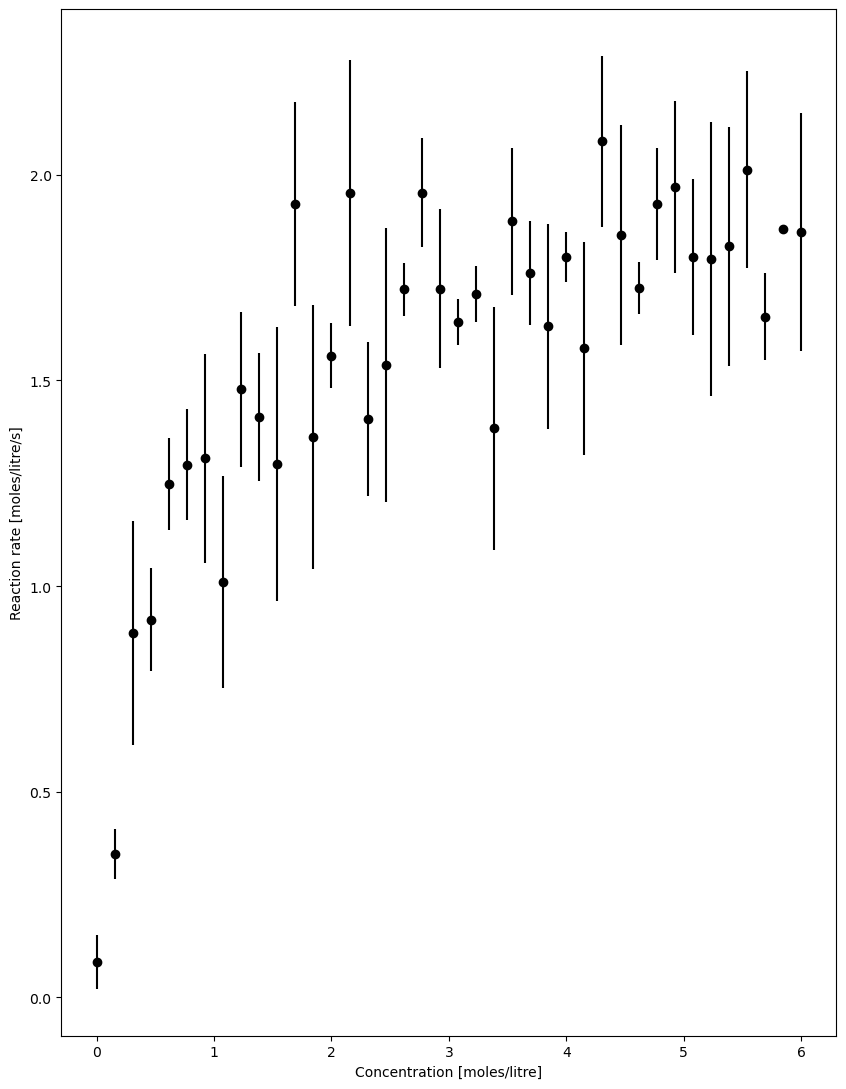

In [4]:
plt.errorbar(x, y, yerr=stds,ls='',color='k',marker='o')
plt.xlabel('Concentration [moles/litre]')
plt.ylabel('Reaction rate [moles/litre/s]')

What kind of model do we expect here? It's likely that as concentration keeps increasing the reaction rate will asymptote, since other chemicals needed for the reaction in the solution will remain constant and thus become a limiting factor. It's also clear that at zero concentration there will zero reaction rate.

If we had no idea what the underlying model is , it could be useful to try fitting some polynomials so we can atleast interpolate between the data points.

Lets start by fitting a quadratic polynomial. Remember the equation for weighted least squares (this comes from minimizing the negative log likelihood for independent data with gaussian errors).:

$$\theta = (X^TWX)^{-1}X^TW\mathbf{y}$$

For a quadratic model $y = ax^2 + bx + c$, we would have 
$$X = \begin{bmatrix}x_1^2 & x_1 & 1 \\ x_2^2 & x_2 & 1 \\ \vdots \\ x_n^2 & x_n & 1  \end{bmatrix} $$

$$W = \begin{bmatrix}1/\sigma_1^2 & 0 & \ldots & 0 \\ 0 & 1/\sigma_2^2 & \ldots & 0 \\ \vdots \\ 0 & \ldots & 0 & 1/\sigma_n^2   \end{bmatrix} $$


$$\theta = \begin{bmatrix}a \\ b \\ c \end{bmatrix}$$

$$\mathbf{y} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $$

X is an $n\times3$ matrix, $\theta$ is a $3\times1$ vector , $\mathbf{y}$ is $n\times1$ vector and W is a $n\times n$ matrix (the inverse of the covariance matrix between the data points).

x shape (40, 3)
y shape  (40,)
W shape (40, 40)


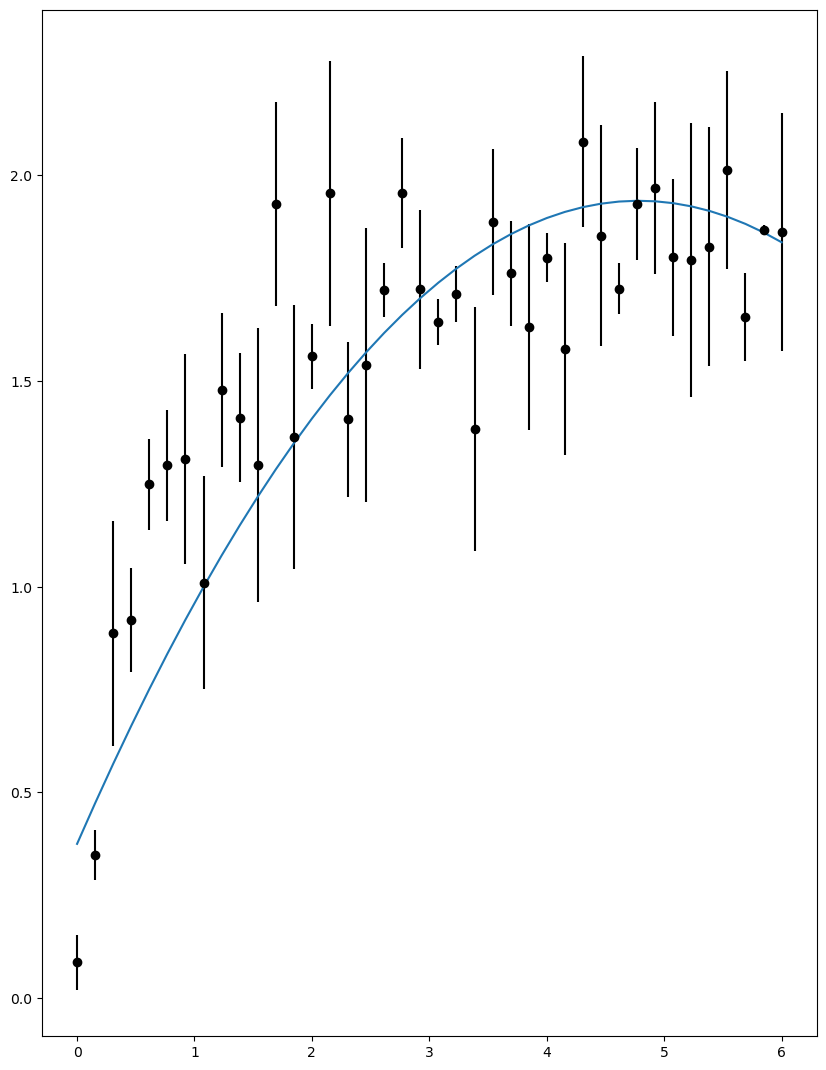

In [5]:
#Define X matrix
X = np.array([x**(i) for i in reversed(range(3))]).T
print('x shape', X.shape)

#define y vector (its already defined for us)
print('y shape ', y.shape)

#define weight matrix
W = np.diag(1/stds**2)
print('W shape', W.shape)

#Now solve for polynomial coefficients a,b,c:
#You can use np.linalg.inv() for matrix inverse, @ operator for matrix multiplication and .T for transpose
#e.g. np.linalg.inv(A.T@A)
theta = _______ 
a,b,c = theta

#your optimal quadratic model is now given by:
def quad(x):
    return a*x**2 + b*x + c 

#Calculate the sum of squared residuals (i.e. the minimum negative log likelihood), 
#these will be useful to compare models later:
residuals2 = np.sum((y-quad(x))**2 / stds**2)

#Plot the results:
plt.errorbar(x, y, yerr=stds,ls='',color='k',
             marker='o')
plt.plot(x,quad(x))


Does the model look reasonable?

In [6]:
residuals2

120.58945598165062

Now lets try the same thing but with a quartic polynomial $y = dx^4 + ex^3 + fx^2 + gx + h$. Plot both on the same plot below.

In [ ]:
#Do it yourself as above ...
_____


#Now there are 5 parameters to fit
d,e,f,g,h = theta

#your optimal quadratic model is now given by:
def quartic(x):
    return d*x**4 + e*x**3 + f*x**2 + g*x + h 

#Calculate the sum of squared residuals (i.e. the minimum negative log likelihood), 
#these will be useful to compare models later:
residuals4 = np.sum((y-quartic(x))**2 / stds**2)

#Plot the results:
plt.errorbar(x, y, yerr=stds,ls='',color='k',
             marker='o')
plt.plot(x,quad(x))
plt.plot(x,quartic(x))

Is the quartic an improvement?

In fact the model we physically expect here is the Michaelis–Menten formula:

$$y = \frac{\beta_1x}{\beta_2 + x}$$

This is a non-linear model in $\beta_2$, so the solution for $\beta_1,\beta_2$ given the data cannot be arrived at analytically.
We will need to use an optimizer like we did last class. What is the negative log-likelihood function that we want to minimize here?


In [ ]:
def neg_log_lik(beta):
    beta_1, beta_2 = beta
    return ______
    

Solve this model for $\beta_1,\beta_2$ using scipy.minimize() (or the optimizer you wrote last class if you're feeling cool) and plot it alongside the other two models.



In [ ]:
#Solving here with scipy.minimize but feel free to use your optimizer from last class.
#beta_1 = res['x'][0] and beta_2 = res['x'][1]
#Sum of squared residuals (minimum of negative log likelihood) given by res['fun']
result = minimize(neg_log_lik, x0=(1,1))

beta_1 = res['x'][0]
beta_2 = res['x'][1]
residuals_mm = res['fun']


#Plot the results:
plt.errorbar(x, y, yerr=stds,ls='',color='k',
             marker='o')
plt.plot(x,quad(x))
plt.plot(x,quartic(x))
plt.plot(x,  beta_1*x / (beta_2 + x))

Which is the best fit then?

We can solve answer question analytically by comparing the AIC, BIC and reduced chi squared values for each fit:

In [ ]:
#defining model goodness of fit criteria
def AIC(k,sum_sq_res):
    return 2*k + 2*sum_sq_res

def BIC(n,k,sum_sq_res):
    return k*np.log(n) + 2*sum_sq_res

def reduced_chi_squared(n,k,sum_sq_res):
    return sum_sq_res / (n-k)

k is the number of fitted parameters in the model, n is the number of data points

In [ ]:
print("AIC quadratic polynomial   ", AIC(3,residuals2))
print("AIC quartic polynomial   ", AIC(4,residuals4))
print("AIC Michaelis–Menten   ", AIC(2,residuals_mm),"\n")

print("BIC quadratic polynomial   ",BIC(n,3,residuals2))
print("BIC quartic polynomial   ",BIC(n,4,residuals4))
print("BIC Michaelis–Menten   ",BIC(n,2,residuals_mm),"\n")

print("reduced chi-squared quadartic polynomial   ",reduced_chi_squared(n,3,residuals2))
print("reduced chi-squared quartic polynomial   ",reduced_chi_squared(n,4,residuals4))
print("reduced chi-squared Michaelis–Menten   ",reduced_chi_squared(n,2,residuals_mm),"\n")

Which model is the best and why?

## Pre built least squares

Now you understand how it works, when applying least squares in future, I recommend using np.linalg.leastsq(). The 'statsmodels' package is also very good for those more interested in statistics and data science.

## Advanced: MCMC with emcee

If we want errors on our model parameters estimates or on our predicted y we can get these analytically for the linear least squares model. However, for the non-linear M-M model there is no analytical way to get these, we need to use something like MCMC.

If you're interested in using MCMC in your project I would recommend starting with the 'emcee' python package. It uses a slightly juiced up metropolis hastings algorithm like we discussed in lecture and the documentation is extensive and very clear.